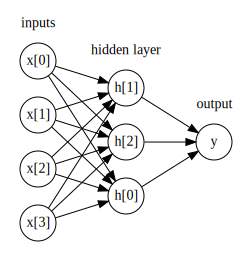

In [4]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

display(mglearn.plots.plot_single_hidden_layer_graph())

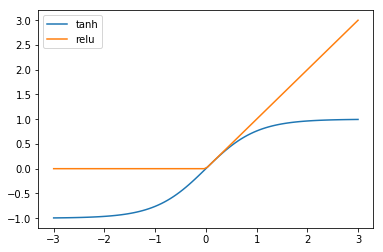

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

line=np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line,0), label='relu')
plt.legend(loc='best')

Text(0,0.5,'Признак 1')

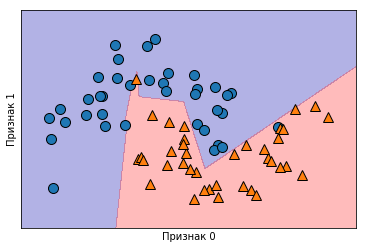

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn

X,y=make_moons(n_samples=100,noise=0.25, random_state=3)
X_train, X_test, y_train, y_test=train_test_split(X,y,stratify=y, random_state=42)
mlp=MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0,0.5,'Признак 1')

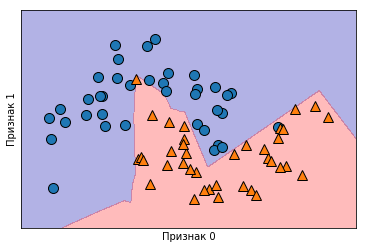

In [21]:
#использование 2 скрытых слоев по 10 элементов в каждом
mlp=MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

Text(0,0.5,'Признак 1')

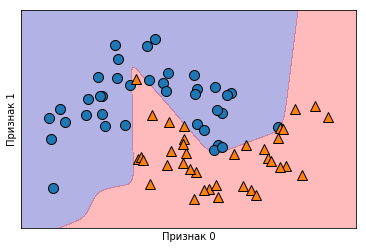

In [23]:
#использование 2 скрытых слоев по 10 элементов с функцией tanh вместо relu
mlp=MLPClassifier(solver='lbfgs',activation='tanh', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train)

plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

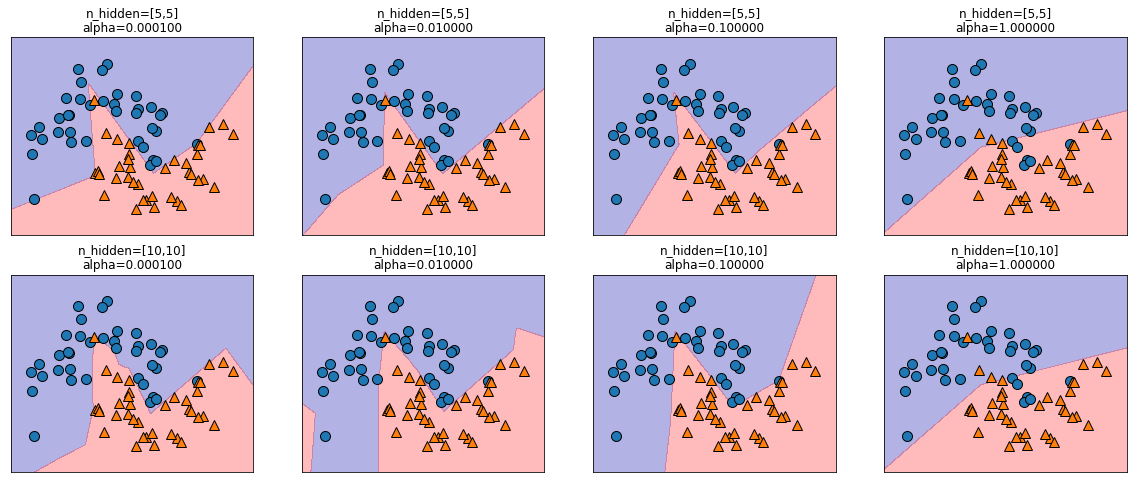

In [27]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes,[5,10]):
    for ax, alpha in zip(axx,[0.0001,0.01,0.1,1]):
        mlp=MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1],y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

In [42]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
X_train, X_test, y_train, y_test=train_test_split(data.data, data.target, random_state=0)

mlp=MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train), mlp.score(X_test, y_test))

0.906103286385 0.881118881119


In [49]:
#стандартизируем наборы данных
#вычисляем среднее и стандартное отклонение для каждого признака
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)

X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train
mlp=MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train), mlp.score(X_test_scaled, y_test))

0.992957746479 0.972027972028


In [51]:
#увеличим альфа для улучшения обобщающей способности модели
mlp=MLPClassifier(max_iter=1000,random_state=0, alpha=1)
mlp.fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train), mlp.score(X_test_scaled, y_test))

0.988262910798 0.972027972028


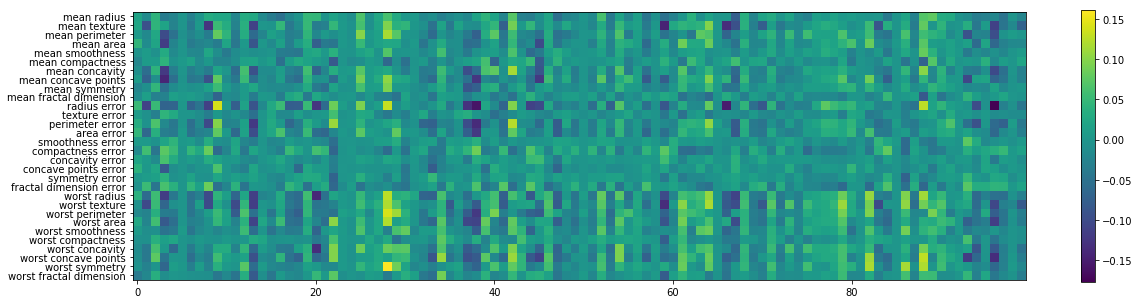

In [54]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), data.feature_names)
plt.colorbar()